In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, how = "left", on =["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

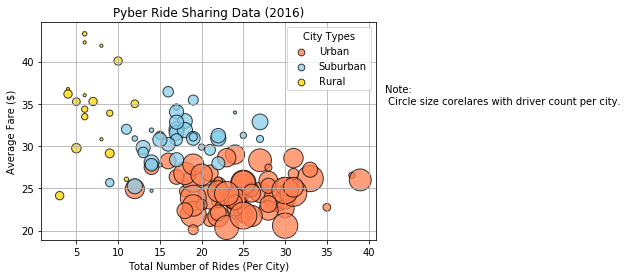

In [2]:
# Obtain the x and y coordinates for each of the three city types

# urban
urban_index = pyber_df["type"] =="Urban"
urban_df = pyber_df[urban_index]
fare_avg_urban = urban_df.groupby("city")["fare"].mean()
ride_count_urban = urban_df.groupby("city")["ride_id"].count()
driver_count_urban = urban_df.groupby("city")["driver_count"].mean()
#nodupes_urban_df = urban_df.drop_duplicates(subset=["city"])
#driver_urban= nodupes_urban_df[["city","driver_count"]].set_index(keys="city", drop=True)

# suburban
suburban_index = pyber_df["type"] == "Suburban"
suburban_df = pyber_df[suburban_index]
fare_avg_suburban = suburban_df.groupby("city")["fare"].mean()
ride_count_suburban = suburban_df.groupby("city")["ride_id"].count()
driver_count_suburban = suburban_df.groupby("city")["driver_count"].mean()
#nodupes_suburban_df = suburban_df.drop_duplicates(subset = ["city"])
#driver_suburban = nodupes_suburban_df[["city", "driver_count"]].set_index(keys="city", drop=True)

#rural
rural_index = pyber_df["type"] == "Rural"
rural_df = pyber_df[rural_index]
fare_avg_rural = rural_df.groupby("city")["fare"].mean()
ride_count_rural = rural_df.groupby("city")["ride_id"].count()
driver_count_rural = rural_df.groupby("city")["driver_count"].mean()
#nodupes_rural_df = rural_df.drop_duplicates(subset= ["city"])
#driver_rural = nodupes_rural_df[["city","driver_count"]].set_index(keys="city", drop= True)
 
# Build the scatter plots for each city types # Incorporate the other graph properties

plt.scatter(ride_count_urban, fare_avg_urban, marker = "o", facecolors = "coral", edgecolors = "black", 
           s = 10*driver_count_urban, alpha = 0.75, label = "Urban")
plt.scatter(ride_count_suburban, fare_avg_suburban, marker = "o", facecolors = "skyblue", edgecolors = "black", 
           s = 10*driver_count_suburban, alpha = 0.75, label = "Suburban")
plt.scatter(ride_count_rural, fare_avg_rural, marker = "o", facecolors = "gold", edgecolors = "black", 
           s = 10*driver_count_rural, alpha = 0.75, label = "Rural")

plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legd = plt.legend(fontsize = "medium", mode = "expanded", numpoints= 5, scatterpoints = 1, loc="best", title="City Types")

legd.legendHandles[0]._sizes = [45]
legd.legendHandles[1]._sizes = [45]
legd.legendHandles[2]._sizes = [45]


# Incorporate a text label regarding circle size
plt.text(42,35, "Note: \n Circle size corelares with driver count per city.")

# Save Figure
plt.savefig("../Images/Ride_sharing.png")

# Show plot
plt.show()

## Total Fares by City Type

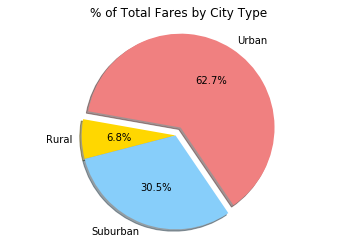

In [3]:
# Calculate Type Percents
total_fare_percent = pyber_df.groupby("type")["fare"].sum()/pyber_df["fare"].sum() * 100

# Build Pie Chart
labels= ["Rural", "Suburban", "Urban"]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.pie(total_fare_percent, 
        labels= labels,
        colors = colors,
        explode = explode,
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 170)

plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Fares_Ciy_Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

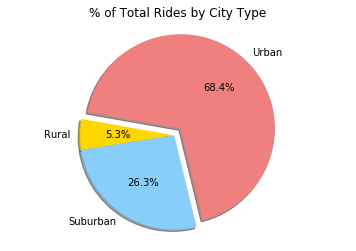

In [4]:
# Calculate Ride Percents
total_rides_percent = pyber_df.groupby("type")["ride_id"].nunique()/ pyber_df["ride_id"].nunique() * 100

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightskyblue", "lightcoral"]

explode = (0,0,0.1)

plt.pie(total_rides_percent, 
        labels= labels, autopct = "%1.1f%%", 
        colors = colors, 
        explode = explode,
        shadow = True, 
        startangle = 170)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Rides_City_Type.png")

# Show Figure
plt.show()


## Total Drivers by City Type

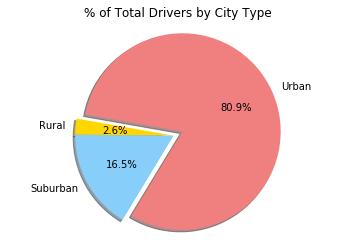

In [5]:
# Calculate Driver Percents
total_drivers_percent = city_data.groupby("type")["driver_count"].sum()/city_data["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightskyblue", "lightcoral"]

explode = (0,0,0.1)

plt.pie(total_drivers_percent, 
        labels= labels, 
        autopct = "%1.1f%%", 
        colors = colors, 
        explode = explode,
        shadow = True, 
        startangle = 170)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Drivers_City_Type.png")

# Show Figure
plt.show()

Three observable trends based on the data:

1. According to the bubble plot, there is an inverse correlation between the number of rides and the average fares. Thus, as the total number of rides increases, the average fares decreases. Also, a higher number of drivers decreases the average fares. we can conclude that the rides might increase because of population density in Urban city resulting in higher demand for rideshare and the number of drivers increases as well. 

2. There is a competition for lower fare rates in the Urban city type as there is a higher number of drivers, and hence the lower average fares. Although Urban city has lower average fares, it has a higher percentage in all other aspects such as total fares, total rides, and the total drivers than the Suburban and Rural city type combined.
 
3. The Rural city type have higher average fares, but the percentage of total fares, total rides, and the total drivers is significantly lower than the Urban and Suburban city type. This suggests that the demand of the pyber rideshare is lower in the cities with less population, which results in the less number of drivers and hence, the higher average fare price, as there is the less competitive environment. 
